In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff

In [24]:
data = pd.read_excel("../Data/get_around_delay_analysis.xlsx")
print(data.head())
print(data.shape)

   rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           NaN   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           NaN   
4     511440  313932       mobile     ended                           NaN   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN  
4                       NaN                                         NaN  
(21310, 7)


In [25]:
data.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


IL y a 4964 valeurs manquante pour la colonne "Delay" qui est celle qui nous intéresse. retirons les valeurs nulles du dataframe

In [27]:
data = data.dropna(subset=['delay_at_checkout_in_minutes'])


In [28]:
print(data.head())
print(data.info())

   rental_id  car_id checkin_type  state  delay_at_checkout_in_minutes  \
1     507750  269550       mobile  ended                         -81.0   
2     508131  359049      connect  ended                          70.0   
5     511626  398802       mobile  ended                        -203.0   
6     511639  370585      connect  ended                         -15.0   
7     512303  371242       mobile  ended                         -44.0   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
5                       NaN                                         NaN  
6                  563782.0                                       570.0  
7                       NaN                                         NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 1 to 21309
Data columns (total 7 columns):
 #   Col

Il y a plus d'utilisateurs en retard qu'à l'heure ou en avance.

## Format des check in

In [29]:
# Liste des colonnes à visualiser (à l'exception de 'checkin_type')
columns_to_visualize = ['state','checkin_type']  # Ajoutez d'autres noms de colonnes au besoin

for column in columns_to_visualize:
    fig = px.pie(data, names=column, title=f'Distribution of {column}')
    fig.show()

# fig = px.pie(data,names='checkin_type')
# fig.show()

Il y davantage d'utilisateurs qui se connectent en se recontrant que par le téléphone. Nous pouvons retirer la colonne state non informative 

## Distribution des retards

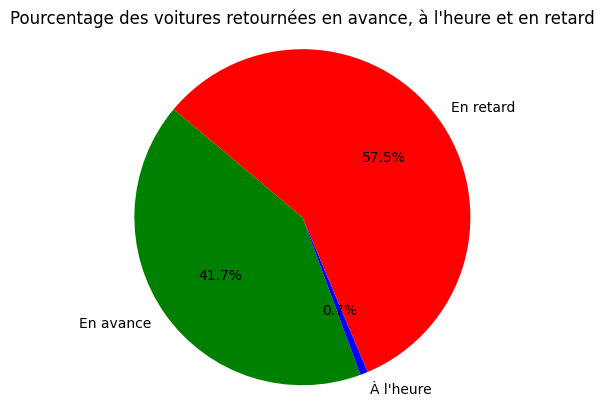

In [30]:
# Compter le nombre de locations pour chaque catégorie
early_count = len(data[data['delay_at_checkout_in_minutes'] < 0])
on_time_count = len(data[data['delay_at_checkout_in_minutes'] == 0])
late_count = len(data[data['delay_at_checkout_in_minutes'] > 0])

# Total des locations
total_count = len(data)

# Calcul des pourcentages
early_percentage = (early_count / total_count) * 100
on_time_percentage = (on_time_count / total_count) * 100
late_percentage = (late_count / total_count) * 100

# Étiquettes et pourcentages
labels = ['En avance', 'À l\'heure', 'En retard']
sizes = [early_percentage, on_time_percentage, late_percentage]
colors = ['green', 'blue', 'red']

# Créer un diagramme en secteurs (pie chart)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Afin de garantir un cercle

# Afficher le diagramme
plt.title('Pourcentage des voitures retournées en avance, à l\'heure et en retard')
plt.show()


In [31]:
data = data.drop(columns=['state'])

In [32]:
# Histogramme de la distribution des retards
fig1 = px.histogram(data, x='time_delta_with_previous_rental_in_minutes', title='Distribution des retards')
fig1.show()

# Diagramme circulaire de la proportion des locations sans location précédente
locations_sans_precedente = data['previous_ended_rental_id'].isnull().sum()
locations_avec_precedente = len(data) - locations_sans_precedente
fig2 = px.pie(names=['Avec location précédente', 'Sans location précédente'], values=[locations_avec_precedente, locations_sans_precedente], title='Proportion des locations avec/sans location précédente')
fig2.show()


In [33]:
positive_data = data[data['delay_at_checkout_in_minutes']>0]
mean_delay = round(data['delay_at_checkout_in_minutes'].mean())
print(f"The average delay is of {mean_delay} minutes ({mean_delay/60} hours).")
average_delay_for_positive_delay = round(positive_data.delay_at_checkout_in_minutes.mean())
median_delay_for_positive_delay = round(positive_data.delay_at_checkout_in_minutes.median())
print(f"The average delay of delayed people is of {average_delay_for_positive_delay} minutes ({round(average_delay_for_positive_delay/60)} hours).")
print(f"The median is quite different because of extremes values: {median_delay_for_positive_delay} minutes ({round(median_delay_for_positive_delay/60)} hour).")


The average delay is of 60 minutes (1.0 hours).
The average delay of delayed people is of 202 minutes (3 hours).
The median is quite different because of extremes values: 53 minutes (1 hour).


On crée un graphique composé de trois sous-graphiques (subplots) pour analyser la distribution des retards au moment du retour (checkout) de véhicules.

In [34]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Delay is extremely spread", "Users have 60min delay in average","Positive delay: 3h avg vs 1h median"))

# First graph : Boxplot of delays
boxplot = go.Box(y=data['delay_at_checkout_in_minutes'],showlegend=False, marker=dict(color='blue'), name='')
fig.add_trace(boxplot, row=1, col=1)
fig.update_yaxes(title_text="Delay (minutes)", row=1, col=1)


# Second graph : Histogram of delays
histogram1 = go.Histogram(x=data['delay_at_checkout_in_minutes'],showlegend=False, marker=dict(color='blue') )
fig.add_trace(histogram1, row=1, col=2)
fig.update_xaxes(title_text="Delay (minutes) zoomed in", range=[-400, 400], row=1, col=2)
# Add average and its legend
fig.add_shape(type="line",x0=mean_delay,y0=0,x1=mean_delay,y1=5000,line=dict(color="red", width=2, dash="dash"),row=1,col=2,)
fig.add_trace(go.Scatter(x=[mean_delay], y=[0], mode="lines", name="Average delay all users (1h)", line=dict(color="red", width=2, dash="dash")), row=1, col=2)

# Third graph : Histogram of positive delays
histogram2 = go.Histogram(x=positive_data['delay_at_checkout_in_minutes'],showlegend=False, marker=dict(color='blue'))
fig.add_trace(histogram2, row=1, col=3)
fig.update_xaxes(title_text="Delay (minutes) zoomed in", range=[0, 1000], row=1, col=3)
# Add average and its legend
fig.add_shape(type="line",x0=average_delay_for_positive_delay,y0=0,x1=average_delay_for_positive_delay,y1=7000,line=dict(color="green", width=2, dash="dash"),row=1,col=3)
fig.add_trace(go.Scatter(x=[average_delay_for_positive_delay], y=[0], mode="lines", name="Average positive delays (3h)", line=dict(color="green", width=2, dash="dash")), row=1, col=3)
# Add median and its legend
fig.add_shape(type="line",x0=median_delay_for_positive_delay,y0=0,x1=median_delay_for_positive_delay,y1=7000,line=dict(color="yellow", width=2, dash="dash"),row=1,col=3)
fig.add_trace(go.Scatter(x=[median_delay_for_positive_delay], y=[0], mode="lines", name="Median positive delays (1h)", line=dict(color="yellow", width=2, dash="dash")), row=1, col=3)

# Layout
fig.update_layout(title="Delay at Checkout",title_font=dict(size=20),legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),width=1000)

# Show the plot
fig.show()



### Impact des délais sur les prochains utilisateurs 

## Impact des délais sur les prochains utilisateurs 

On trie d'abord les données par 'car_id' et 'rental_id', puis on crée une nouvelle colonne 'delay_of_previous_user' pour stocker les retards des utilisateurs précédents. On parcourt ensuite le DataFrame trié, on vérifie s'il y a une valeur dans la colonne 'previous_ended_rental_id', et s'il y en a une, on recherche le retard correspondant dans le DataFrame. Enfin, on calcule la différence entre l'écart de temps attendu entre deux locations et le retard du premier utilisateur. Les 10 premières lignes du DataFrame trié sont ensuite affichées pour vérification.

In [36]:
# Tri des données par 'car_id' puis 'rental_id'
sorted_delay = data.sort_values(by=['car_id', 'rental_id'])

# Création de la colonne 'delay_of_previous_user' pour stocker les retards des utilisateurs précédents
# Initialisation de la colonne avec des valeurs NaN
# delay['delay_of_previous_user'] = np.nan

# Pour chaque ligne dans le DataFrame trié
for index, row in sorted_delay.iterrows():
    # Récupération de la valeur de la colonne 'previous_ended_rental_id' pour la ligne actuelle
    previous_ended_rental_id = row['previous_ended_rental_id']
    # Vérification si la valeur de 'previous_ended_rental_id' n'est pas nulle
    if pd.notnull(previous_ended_rental_id):
        # S'il y a une valeur, recherche de la location correspondante dans le DataFrame et récupération du retard associé
        previous_delay = sorted_delay.loc[sorted_delay['rental_id'] == previous_ended_rental_id, 'delay_at_checkout_in_minutes']
        # Vérification si la variable 'previous_delay' n'est pas vide
        if not previous_delay.empty:
            # Attribution du retard du précédent utilisateur à la colonne 'delay_of_previous_user' pour la ligne actuelle
            sorted_delay.at[index, 'delay_of_previous_user'] = previous_delay.iloc[0]

# Calcul de la différence entre l'écart de temps attendu entre 2 locations et le retard du premier
sorted_delay['delta_timegap_delay'] = sorted_delay['time_delta_with_previous_rental_in_minutes'] - sorted_delay['delay_of_previous_user']

# Affichage des 10 premières lignes du DataFrame
pd.set_option('display.max_rows', None)
sorted_delay.head(10)

# Vérification du DataFrame : pour la voiture 159533, nous voyons que le retard a effectivement été enregistré.


,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_of_previous_user,delta_timegap_delay
1168,543011,159250,mobile,8.0,NaN,NaN,NaN,NaN
16548,559533,159250,mobile,142.0,NaN,NaN,NaN,NaN
8100,505485,159533,connect,-16.0,NaN,NaN,NaN,NaN
1446,512682,159533,connect,-125.0,NaN,NaN,NaN,NaN
1733,527121,159533,connect,-560.0,NaN,NaN,NaN,NaN
15971,547307,159533,connect,-6.0,NaN,NaN,NaN,NaN
4803,554383,159533,connect,41.0,512682.0,330.0,-125.0,455.0
6094,534761,159536,mobile,1303.0,NaN,NaN,NaN,NaN
12600,543374,159536,mobile,-78.0,NaN,NaN,NaN,NaN
13470,546345,159536,mobile,122.0,NaN,NaN,NaN,NaN


On analyse la colonne 'time_delta_with_previous_rental_in_minutes' en supprimant les valeurs manquantes, puis calcule la moyenne de cette colonne. Ensuite, on crée un histogramme pour visualiser la distribution des écarts de temps prévus entre les locations consécutives, en ajoutant une ligne pour représenter la moyenne. Enfin, on identifie les courtes périodes de rotation (écart de temps inférieur à 60 minutes) et calcule le pourcentage de locations correspondantes.

In [39]:
# Analyse de la colonne 'time_delta_with_previous_rental_in_minutes'
print("Timegap est le temps attendu entre deux locations.")
# Suppression des lignes avec des valeurs manquantes dans 'time_delta_with_previous_rental_in_minutes'
df_timegaps = sorted_delay.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
print(f"Cette variable a seulement {len(df_timegaps)} valeurs , donc on crée une nouveau dataframe df_timegaps")
# Calcul de la moyenne de la colonne 'time_delta_with_previous_rental_in_minutes'
average_time_gap = df_timegaps['time_delta_with_previous_rental_in_minutes'].mean()

# Distribution des écarts de temps
# Création d'un histogramme avec 'time_delta_with_previous_rental_in_minutes' sur l'axe x
fig = px.histogram(df_timegaps, x='time_delta_with_previous_rental_in_minutes')
# Ajout de la ligne de la moyenne
fig.add_trace(go.Scatter(x=[average_time_gap, average_time_gap], y=[0, 350], mode='lines', line=dict(color='red', dash='dash'), name='Average (5h)'))
fig.update_layout(title="Distribution of Time Gaps planned between Consecutive Rentals", xaxis_title="Time Gap (minutes)", yaxis_title="Count", showlegend=True)
fig.show()

print(f"En moyenne, il y a  {round(average_time_gap / 60)}heur de temps attendu entre deux locations consecutives.")
# Affiche en moyenne, il y a un écart de temps de {round(average_time_gap / 60)} heures entre les locations consécutives.

# Courtes périodes de rotation
# Sélection des locations avec un écart de temps inférieur à 60 minutes
short_turnaround = df_timegaps[df_timegaps['time_delta_with_previous_rental_in_minutes'] < 60]
# Calcul du pourcentage de courtes périodes de rotation
percentage_short_turnaround = 100 * len(short_turnaround) / len(df_timegaps)
print(f"La situation la plus courante est une rotation courte (moins d'1 heure) : {round(percentage_short_turnaround)} % des locations avec un écart de temps.")
# La situation la plus fréquente est une courte période de rotation (moins d'1 heure) : {round(percentage_short_turnaround)}% des locations ont un écart de temps.


Timegap est le temps attendu entre deux locations.
Cette variable a seulement 1515 valeurs , donc on crée une nouveau dataframe df_timegaps


En moyenne, il y a  5heur de temps attendu entre deux locations consecutives.
La situation la plus courante est une rotation courte (moins d'1 heure) : 22 % des locations avec un écart de temps.


## EDA sur le prix 

In [50]:
data = pd.read_csv('/home/amandine/Documents/JEDHA/Fullstacj/Projects/Block_5_Deployment/Data/get_around_pricing_project.csv')

In [51]:
data.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


Les colonnes du dataframe contiennent des informations sur différents attributs des voitures, y compris des détails sur la voiture elle-même, ses caractéristiques, ses options et son prix de location. L'analyse exploratoire des données (EDA) peut être effectuée pour mieux comprendre la distribution et les tendances de ces données.

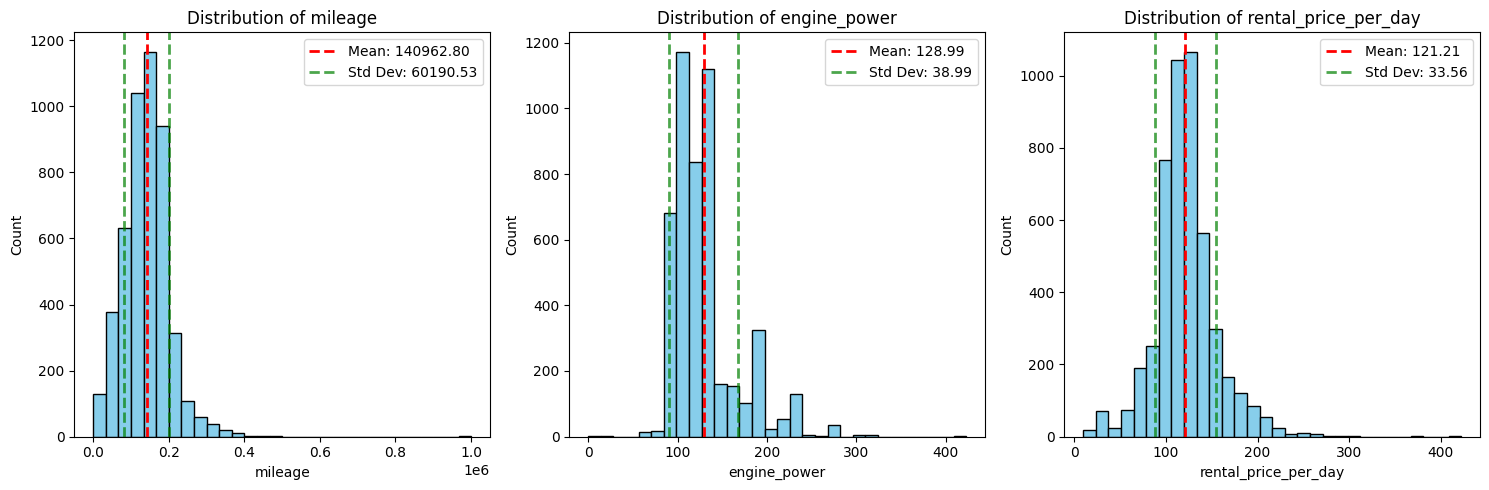

In [52]:
# Variables
variables = ["mileage", "engine_power", "rental_price_per_day"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, variable in enumerate(variables):
    ax = axes[i]

    # Plot histogram
    ax.hist(data[variable], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')

    # Calculate mean and standard deviation
    mean = np.mean(data[variable])
    std = np.std(data[variable])

    # Add mean and standard deviation to the plot
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std:.2f}', alpha=0.7)
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, alpha=0.7)

    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


La distribution des données montre que les données de kilométrages, de puissance moteurs et des prix de location par jour sont symétriques. Nous allons vérifier si des outliers sont à retirer.

In [53]:


# Spécifier les caractéristiques à traiter
features = ['mileage', 'engine_power', 'rental_price_per_day']

# Définir la limite à ±3 écarts types de la moyenne
std_limit = 3

# Créer une boucle pour chaque caractéristique
for feature in features:
    # Calculer la moyenne et l'écart type
    mean = data[feature].mean()
    std = data[feature].std()
    
    # Définir les limites inférieure et supérieure pour les outliers
    lower_limit = mean - std_limit * std
    upper_limit = mean + std_limit * std
    
    # Filtrer les données pour conserver uniquement celles qui se trouvent dans les limites
    data = data[(data[feature] >= lower_limit) & (data[feature] <= upper_limit)]

# Afficher les premières lignes du DataFrame nettoyé
print(data.head())
print(data.shape)


   Unnamed: 0 model_key  mileage  engine_power    fuel paint_color  \
0           0   Citroën   140411           100  diesel       black   
2           2   Citroën   183297           120  diesel       white   
3           3   Citroën   128035           135  diesel         red   
4           4   Citroën    97097           160  diesel      silver   
5           5   Citroën   152352           225  petrol       black   

      car_type  private_parking_available  has_gps  has_air_conditioning  \
0  convertible                       True     True                 False   
2  convertible                      False    False                 False   
3  convertible                       True     True                 False   
4  convertible                       True     True                 False   
5  convertible                       True     True                 False   

   automatic_car  has_getaround_connect  has_speed_regulator  winter_tires  \
0          False                   True     

In [54]:
data.shape

(4705, 15)

Nous n'avons pas d'outlier à retirer.

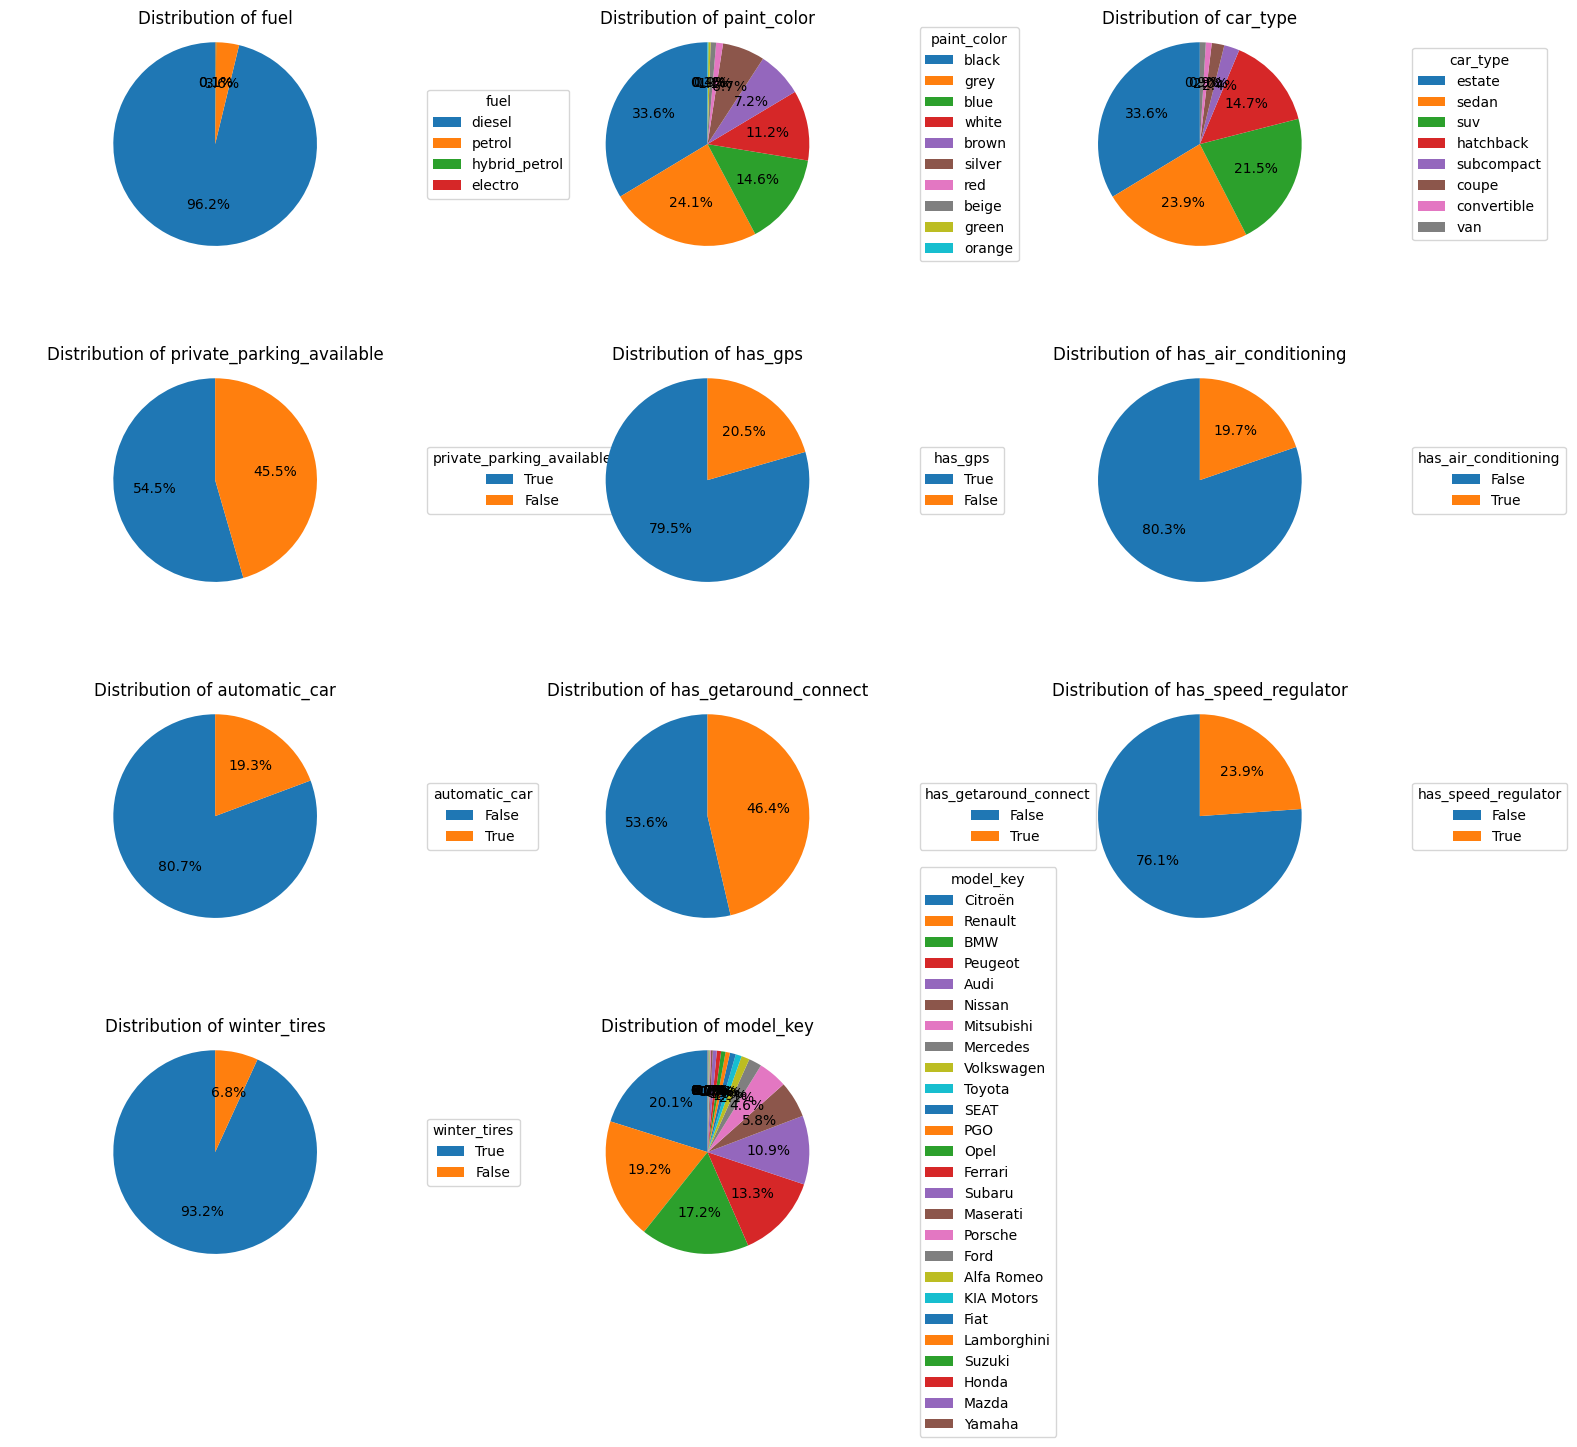

In [60]:
# Liste des colonnes catégoriques à visualiser
categorical_columns = ['fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps',
                       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
                       'has_speed_regulator', 'winter_tires', 'model_key']

# Créer des sous-graphiques
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
fig.subplots_adjust(hspace=0.5)

# Parcourir les colonnes catégoriques
for i, column in enumerate(categorical_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Obtenir le compte des différentes catégories
    category_counts = data[column].value_counts()

    # Tracer un camembert
    ax.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Assurez-vous que le camembert est circulaire
    ax.set_title(f'Distribution of {column}')

    # Ajouter la légende
    ax.legend(category_counts.index, title=column, loc='center left', bbox_to_anchor=(1, 0.5))

# Supprimer les sous-graphiques non utilisés
for i in range(len(categorical_columns), 12):
    fig.delaxes(axes[i // 3, i % 3])

plt.show()

On génère une heatmap annotée pour visualiser la matrice de corrélation entre les variables du DataFrame pricing. cela nous aidera à identifier les corrélations entre les différentes variables, ce qui peut être utile pour comprendre quelles variables sont liées à la variable "rental price" (prix de location).

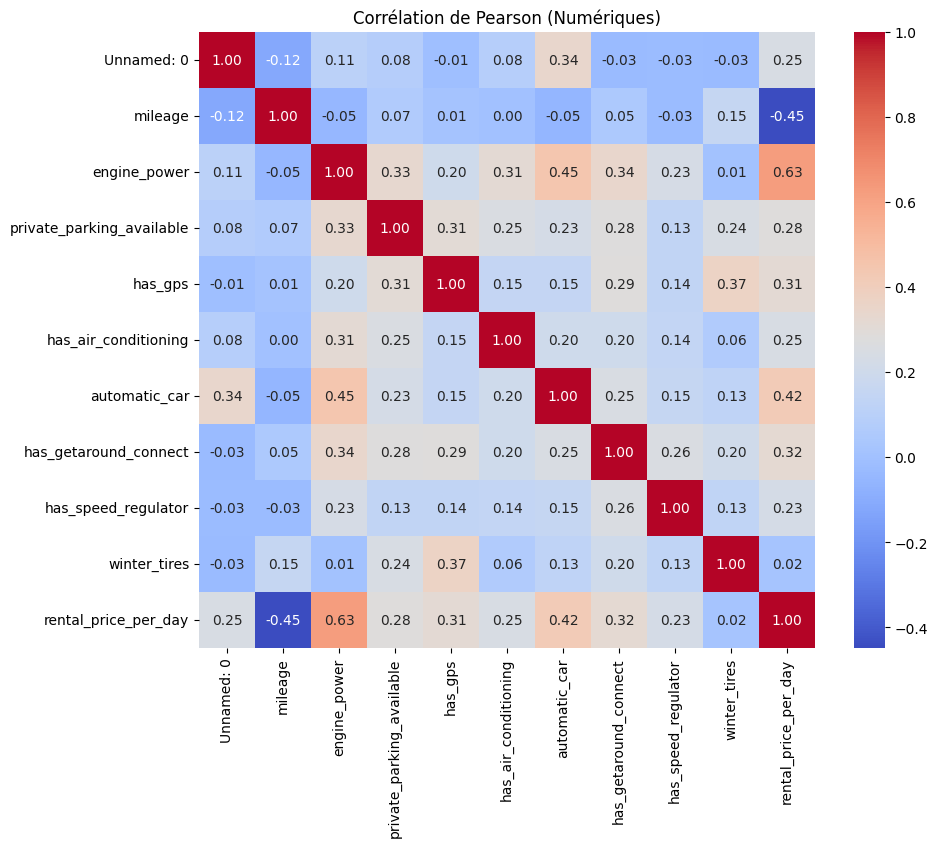

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

# Charger les données
data = pd.read_csv('/home/amandine/Documents/JEDHA/Fullstacj/Projects/Block_5_Deployment/Data/get_around_pricing_project.csv')

# Sélectionner les variables catégorielles
categorical_columns = ['model_key', 'fuel', 'paint_color', 'car_type']

# Sélectionner les variables numériques
numeric_columns = [col for col in data.columns if col not in categorical_columns]

# Calculer la corrélation de Cramer's V entre les variables catégorielles
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_val = cramers_v(data[col1], data[col2])
        cramer_matrix.loc[col1, col2] = cramers_v_val

# Calculer la corrélation de Pearson entre les variables numériques
pearson_matrix = data[numeric_columns].corr()



plt.figure(figsize=(10, 8))
sns.heatmap(pearson_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Corrélation de Pearson (Numériques)")
plt.show()


Certaines variables sont plus corrélées au prix de location que d'autres. La distance parcourue (kilométrage) est inversement corrélée au prix, ce qui signifie que plus la distance est grande, moins le prix est élevé. De plus, la puissance du moteur est également corrélée positivement au prix de location, ce qui suggère que les voitures avec des moteurs plus puissants ont tendance à être plus chères à louer.

À l'exception des pneus d'hiver, toutes les autres variables semblent également jouer un rôle important dans la détermination du prix de location. Cela signifie que des facteurs tels que la couleur de la peinture, le type de carrosserie, la disponibilité d'un parking privé, la présence de GPS, la climatisation, la transmission automatique, la connectivité Getaround, le régulateur de vitesse, et les pneus d'été ont tous une influence sur le prix.

En revanche, il n'y a pas de corrélation significative entre ces variables entre elles, ce qui signifie qu'elles ne sont pas fortement liées les unes aux autres.